# National Bureau of Economic Research (NBER)

According to its website, NBER was founded in 1920 and is a private, non-profit, non-partisan organization dedicated to conducting economic research and to disseminating research findings among academics, public policy makers, and business professionals. NBER-affiliated researchers study a wide range of topics and they employ many different methods in their work. Key focus areas include developing new statistical measurements, estimating quantitative models of economic behavior, and analyzing the effects of public policies.

This notebook exemplifies what can be done from the scraped data. It's not an attempt to provide causal explanations. Instead, I'm just providing descriptive trends. Both code and data are open (see: [<strong>github.com/ledwindra/nber</strong>](https://github.com/ledwindra/nber). Feel free to modify this if you find it useful. 🍻

In [52]:
# load module and data
import nber_paper

nber = nber_paper.get_data('data/nber.zip')
repec = nber_paper.get_data('data/repec.zip')

In [258]:
df = pd.merge(nber, repec, how='inner', on='id')
df.head()

,id,citation_title,citation_author,citation_date,citation_publication_date,citation_technical_report_institution,citation_technical_report_number,citation_journal_title,citation_journal_issn,citation_pdf_url,topics,abstract,also_downloaded,acknowledgement,total_cites,cited_by,reference
0,27754,Centrino and the Restructuring of WI-FI Supply,"['Fontana, Roberto', 'Greenstein, Shane']",2020-08-27,2020/08/27,National Bureau of Economic Research,w27754,National Bureau of Economic Research Working P...,0898-2937,https://www.nber.org/papers/w27754.pdf,"['Industrial Organization', 'Productivity, Inn...",In this paper we examine Intel’s launch of Cen...,NaN,Acknowledgments Fontana thanks the University ...,NaN,NaN,NaN
1,27711,What Good Are Treatment Effects without Treatm...,"['Cronin, Christopher J', 'Forsstrom, Matthew ...",2020-08-21,2020/08/21,National Bureau of Economic Research,w27711,National Bureau of Economic Research Working P...,0898-2937,https://www.nber.org/papers/w27711.pdf,"['Economics of Aging', 'Health Economics']",Mounting evidence across disciplines shows tha...,NaN,Acknowledgments October Current August We grat...,NaN,NaN,NaN
2,24320,Global Portfolio Rebalancing and Exchange Rates,"['Camanho, Nelson', 'Hau, Harald', 'Rey, Hélène']",2018-02-15,2018/02/15,National Bureau of Economic Research,w24320,National Bureau of Economic Research Working P...,0898-2937,https://www.nber.org/papers/w24320.pdf,"['Asset Pricing', 'International Finance and M...",We examine international equity allocations at...,"['https://www.nber.org/papers/w24280', 'https:...",Acknowledgments thank seminar participants in ...,53.0,4.0,"['Adrian, T., Etula E. and Shin, H.S., 2014. R..."
3,27691,"Low Interest Rates, Policy, and the Predictive...","['Bordo, Michael D', 'Haubrich, Joseph G']",2020-08-14,2020/08/14,National Bureau of Economic Research,w27691,National Bureau of Economic Research Working P...,0898-2937,https://www.nber.org/papers/w27691.pdf,"['International Finance and Macroeconomics', '...",Does the yield curve's ability to predict futu...,NaN,Acknowledgments views stated herein are those ...,NaN,NaN,NaN
4,27707,Measuring Customer Churn and Interconnectedness,"['Baker, Scott R', 'Baugh, Brian', 'Sammon, Ma...",2020-08-14,2020/08/14,National Bureau of Economic Research,w27707,National Bureau of Economic Research Working P...,0898-2937,https://www.nber.org/papers/w27707.pdf,"['Asset Pricing', 'Corporate Finance']",This paper demonstrates that it is possible to...,NaN,Acknowledgments views expressed herein are tho...,NaN,NaN,NaN


In [275]:
import pandas as pd
import nltk
import numpy as np
from afinn import Afinn
from nltk.corpus import stopwords

In [248]:
df = nber[['acknowledgement']]
df = df[df['acknowledgement'].isna() == False]

In [249]:
nber['acknowledgement'][0]

'Acknowledgments Fontana thanks the University of Pavia for financial and the HBS Deans Office for their hospitality during his The views expressed herein are those of the authors and do not necessarily reflect the views of the National Bureau of Economic to bibliography'

In [250]:
df['acknowledgement'] = df.apply(lambda x: x['acknowledgement'].lower(), axis=1)
df['acknowledgement'] = df.apply(lambda x: x['acknowledgement'].replace('acknowledgments ', ''), axis=1)

In [251]:
ack = df['acknowledgement'].to_list()
ack = [x.split() for x in ack]
data = []
for i in ack:
    for j in i:
        data.append(j)

In [254]:
sw = stopwords.words('english') + ['views', 'bibliography', 'national', 'economic', 'bureau', 'nber', 'also']
data = [x for x in data if x not in sw]

In [255]:
df = pd.DataFrame(data, columns=['word']).groupby('word').size().to_frame().reset_index()
df = df.rename(columns={0: 'count'})
df = df.sort_values(by='count', ascending=False).reset_index(drop=True)
df.head(30)

,word,count
0,research,15776
1,expressed,15644
2,necessarily,15212
3,reflect,14346
4,herein,13918
5,thank,13849
6,authors,13391
7,return,12038
8,university,11332
9,participants,9164


In [67]:
afinn = Afinn()

In [260]:
df = df[['id', 'abstract', 'acknowledgement', 'cited_by']]
df = df[(df['abstract'].isna() == False) & (df['acknowledgement'].isna() == False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27026 entries, 0 to 27365
Data columns (total 4 columns):
id                 27026 non-null int64
abstract           27026 non-null object
acknowledgement    27026 non-null object
cited_by           26726 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ MB


In [261]:
# lowercase
df['acknowledgement'] = df.apply(lambda x: x['acknowledgement'].lower(), axis=1)
df['abstract'] = df.apply(lambda x: x['abstract'].lower(), axis=1)

# special treatment for acknowledgement
df['acknowledgement'] = df.apply(lambda x: x['acknowledgement'].replace('acknowledgments ', ''), axis=1)

In [262]:
df.head()

,id,abstract,acknowledgement,cited_by
0,27754,in this paper we examine intel’s launch of cen...,fontana thanks the university of pavia for fin...,NaN
1,27711,mounting evidence across disciplines shows tha...,october current august we gratefully acknowled...,NaN
2,24320,we examine international equity allocations at...,thank seminar participants in numerous univers...,4.0
3,27691,does the yield curve's ability to predict futu...,views stated herein are those of the authors a...,NaN
4,27707,this paper demonstrates that it is possible to...,views expressed herein are those of the author...,NaN


In [263]:
df['ack_score'] = df.apply(lambda x: afinn.score(x['acknowledgement']), axis=1)
df['abs_score'] = df.apply(lambda x: afinn.score(x['abstract']), axis=1)

In [327]:
df[['cited_by', 'ack_score', 'abs_score']].corr()

,cited_by,ack_score,abs_score
cited_by,1.000000,-0.083266,0.016924
ack_score,-0.083266,1.000000,0.007222
abs_score,0.016924,0.007222,1.000000


In [325]:
df = df[(df['cited_by'] < np.mean(df['cited_by']) + (2 * np.std(df['cited_by']))) & (df['cited_by'] > np.mean(df['cited_by']) - (2 * np.std(df['cited_by'])))]

In [326]:
df = df.sort_values(by='id', ascending=True)
df = df.reset_index(drop=True)
df.head()

,id,abstract,acknowledgement,cited_by,ack_score,abs_score,log_ack_score,log_abs_score,log_cited_by
0,1,this represents two chapters of a proposed boo...,to bibliography,1.0,0.0,-4.0,0.000000e+00,0.000000e+00,0.000000e+00
1,2,a topic of continued public concern is the nat...,return to bibliography,1.0,0.0,6.0,0.000000e+00,1.791759e+00,0.000000e+00
2,3,"in this paper, we have developed an operationa...",return to bibliography,0.0,0.0,0.0,-5.201799e+274,-5.201799e+274,-5.201799e+274
3,4,the purpose of this paper is to consider human...,return to bibliography,4.0,0.0,0.0,6.020600e-01,6.020600e-01,1.386294e+00
4,5,the household production model provides a usef...,return to bibliography,0.0,0.0,5.0,1.609438e+00,1.609438e+00,1.609438e+00


In [197]:
df[['ack_score', 'abs_score']].describe()

,ack_score,abs_score
count,27354.000000,27354.000000
mean,4.211523,2.569533
std,5.473186,9.044345
min,-17.000000,-69.000000
25%,0.000000,-2.000000
50%,2.000000,3.000000
75%,7.000000,7.000000
max,88.000000,51.000000


<AxesSubplot:ylabel='Frequency'>

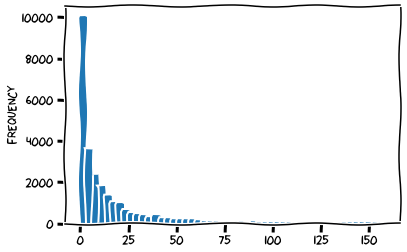

In [331]:
df.cited_by.plot(kind='hist', bins=50)

<AxesSubplot:xlabel='ack_score', ylabel='cited_by'>

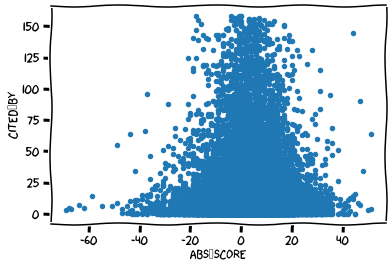

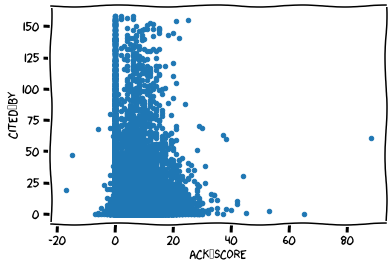

In [328]:
df.plot(x='abs_score', y='cited_by', kind='scatter')
df.plot(x='ack_score', y='cited_by', kind='scatter')

<AxesSubplot:ylabel='Frequency'>

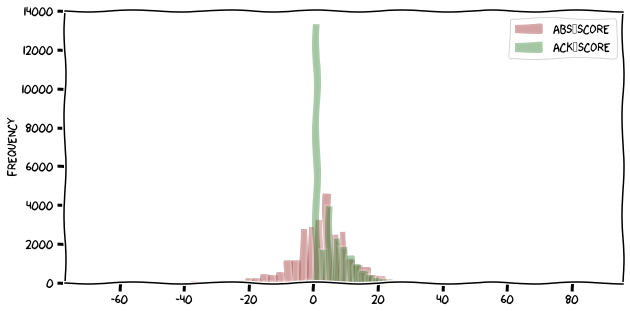

In [316]:
df.abs_score.plot(kind='hist', color='darkred', bins=50, alpha=0.2, figsize=(10, 5), legend=True)
df.ack_score.plot(kind='hist', color='darkgreen', bins=50, alpha=0.2, figsize=(10, 5), legend=True)
# df.cited_by.plot(kind='hist', color='darkblue', bins=50, alpha=0.2, figsize=(10, 5), legend=True)

<AxesSubplot:xlabel='id'>

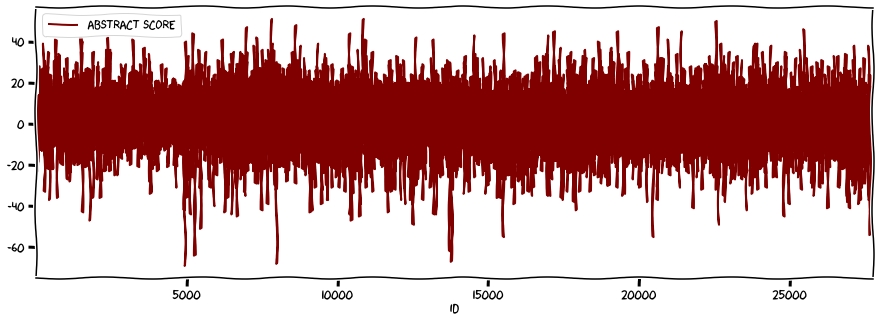

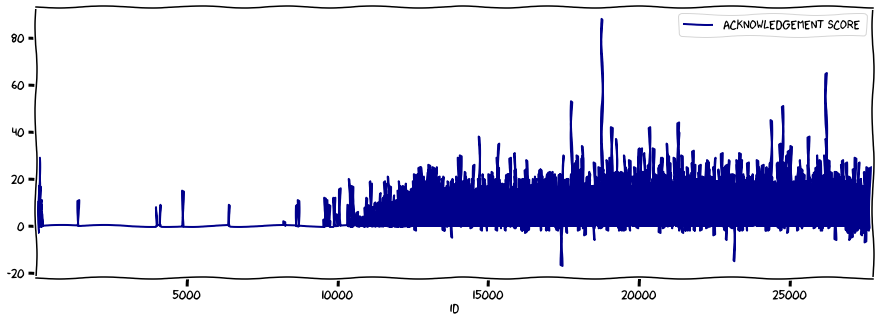

In [240]:
df.plot(x='id', y='abs_score', figsize=(15, 5), color='maroon', label='abstract score')
df.plot(x='id', y='ack_score', figsize=(15, 5), color='darkblue', label='acknowledgement score')

# Trends over time

First, I would like highlight the trends of published papers in NBER. Currently there are almost 30 thousand working papers available in NBER. We can see below that total published papers per year have been increasing over periods of time since the 1970s until 2020.

In [ ]:
nber_paper.published_paper(nber_paper.count_by_year(nber), 'Total published papers by year', 5, 200)

### Acknowledgements

Next, you might be curious what would economists say in their acknowledgements. Are they kind enough to say thanks to their collaborators, donors, assistants, etc? Below, we can see there's a skyrocketing numbers of economists saying such thing since the early 21st century. Isn't it interesting? Why prevented them to say so prior these years? What factors that drive economists to be more kind human beings? Was it <strong>not</strong> a thing to write such thing acknowledgements in the past? Or maybe they didn't write one at all?

In [ ]:
nber_paper.section_trends(nber, 'acknowledgement', 'thank', 'thank', 5, 200)

Here's another good trend among economists that seemed to start in the early 21st century: giving kind words in the acknowledgement, such as <strong>excellent research</strong>. I assume that these days published papers are more collaborative, which may involve research assistants in producing their works, hence it drives these economists to be more generous. Who do you think the most generous economists?

In [ ]:
nber_paper.section_trends(nber, 'acknowledgement', 'excellent research', 'excellent research', 5, 50)

Among these five economists, you may be familiar with one name. Yes, it's [<strong>Daron Acemoglu</strong>](https://en.wikipedia.org/wiki/Daron_Acemoglu), one of the authors of the well known book titled [<strong>Why Nations Fail</strong>](https://en.wikipedia.org/wiki/Why_Nations_Fail). Looking at their Wikipedia pages, the other four seem to be also well known in the field of economics as well. 😄

In [ ]:
excellent = nber[(nber['acknowledgement'].isna() == False) & (nber['acknowledgement'].str.contains('excellent research'))]
excellent = nber_paper.top_five(excellent,'citation_author', '\'')
nber_paper.bar_plot(excellent, 'Economists', 'Economists who said excellent research the most in their NBER WP acknowledgement', 'citation_author', -0.5, -12)

Not only that, economists seem to be more transparent about fundings. Again, this is interesting to look at. Why did these trends start relatively at the same time? Is it mandatory among economists to publish in their NBER working papers?

In [ ]:
nber_paper.section_trends(nber, 'acknowledgement', 'funded by', 'funded by', 5, 5)

Further investigation about collaborations in economics can be seen below. I am not sure whether it's a good metric to measure collaboration, but here we can see that median total authors per paper in economics are between one and three. Maybe it's not because economics isn't a collaborative field per se, but the collaborators are perhaps not included as the authors.

In [ ]:
nber_paper.collaboration(nber)

### Abstract

Next thing I would like show is trends in the abstract section. From this, we may get the trends of economics over time. Below we can see the trends of [<strong>development</strong>](https://en.wikipedia.org/wiki/Development_economics) since early 1970s. It's interesting to see that it has ups and downs for each decade.

In [ ]:
nber_paper.section_trends(nber, 'abstract', 'development', 'development', 5, 10)

We can also see that [<strong>randomized controlled trial<strong>](https://en.wikipedia.org/wiki/Randomized_controlled_trial) as a methodology started to gain traction in the early 21st century. However, its adoption is still relatively low nonetheless.

In [ ]:
nber_paper.section_trends(nber, 'abstract', 'randomized controlled trial', 'randomized controlled trial', 3, 2)

Even more striking is trends of using <strong>pandemic</strong> in the abstract section. 2020 is hit hard by the COVID-19 pandemic and it looks like economists don't want to miss out a thing. A whopping working papers containing this word are published in 2020 alone!

In [ ]:
nber_paper.section_trends(nber, 'abstract', 'pandemic', 'pandemic', 3, 20)

# Citations

Networks do play a role in the academia, however big it is. One of the possible measurements is the citations. Below, I present the relationship between citing and being cited. In the horizontal axis, we can see the numbers of cites per paper; and the vertical axis tells us about how many times these papers are cited by other researchers. Note that no causality implied in this graph.

We can see that outliers exist in the citation game. There are a small numbers of papers that are cited over a thousand times despite only citing less than 50! On the other hand, some others cite more than one hundred and are only cited less than 500.

In [ ]:
nber_paper.citation(repec)

What about the distributions? Total cites seem to be more normally distributed than total cited by (both log-scaled). In fact, it looks like that median cites are way more than median cited. Do you think that it makes sense? 

In [ ]:
nber_paper.citation_density(repec)

# Popularity by topics

Like music or movies, economics also have genres or topics. Fortunately, NBER cover quite wide range of issues in their working papers. Each paper can contain more than one topics. So, in graph below I present the distinct numbers of times each topic appears in the papers. We can see that [<strong>Labor Studies</strong>](https://en.wikipedia.org/wiki/Labour_economics) is the most popular topic by far, where it cover around a thousand working papers in NBER.

In [ ]:
nber_paper.bar_plot(nber_paper.top_five(nber), 'Topics', 'Most popular topics in NBER', 'topics', -0.5, -650)

Despite the fluctuations, almost all of them have upward trends over the years. It looks like <strong>International Trade and Investment</strong> and <strong>International Finance and Macroeconomics</strong> are losing grounds in this field.

In [ ]:
nber_paper.top_five_trends(nber, 'topics', ',', 'Most popular topics in NBER by year')

# Prolific economists

Lastly I would like to highlight the most prolific economists. We can see that Daron Acemoglu appears to be among top five again (remember that he's one of those economists who said <strong>excellent research</strong> the most? 😀). Can you imagine how can he publish so many papers while also writing a popular book? What factors that contribute to his dedication in economics (is it <strong>passion</strong>? If not, then what do you think it is?

In [ ]:
nber_paper.bar_plot(nber_paper.top_five(nber, 'citation_author', '\''), 'Economists', 'Most prolific economists in NBER', 'citation_author', -0.5, -70)

These prolific economists happen to be seniors, whose career started since in the 1970s-80s, yet they are stil productive in present days (except Martin Feldstein, who died in 2019).

In [ ]:
nber_paper.top_five_trends(nber, 'citation_author', '\'', 'Most prolific economists in NBER by year')

# Outro

If you have reached this point, I would like to say thank you and hopefully you enjoy this as much as I do in creating this stuff 😎. This notebook is automatically updated even if there's a new working paper coming and I may have to update the narratives as well (e.g. most popular topics in econs, etc).

Feel free to file issues if you happen to find bugs in the code or if you have any questions. Cheers! 🍻